In [308]:
import random
#from pprint import pprint

In [309]:
# Creates a list containing 59 lists, each of 22 items, all set to 0
wreal, hreal = 22, 59;
w, h = 24, 60; #should be a multiple of brick_repeat_count
brick_wall = [['0' for x in range(w)] for y in range(h)] 

In [338]:
brick_arr=['F','G','S']
brick_repeat_count = 2 #Maximum allowed consecutive bricks of same type
speck_repeat_interval = 9 #Must be perfect square
speck_interval = 3 #Sqrt(speck_repeat_interval)

# Fill first 3x3 block
for i in range(brick_repeat_count):
    for j in range(brick_repeat_count):
        brick_wall[i][j] = brick_arr[random.randint(0,1)]
        
# Fill first 3 rows
for i in range(brick_repeat_count):
    for j in range(brick_repeat_count,w):
        if (brick_wall[i][j-1]=='G' and brick_wall[i][j-2]=='G' ):#and brick_wall[i][j-3]=='G'):
            brick_wall[i][j] = 'F'
        elif (brick_wall[i][j-1]=='F' and brick_wall[i][j-2]=='F'):# and brick_wall[i][j-3]=='F'):
            brick_wall[i][j] = 'G'
        else:                
            brick_wall[i][j] = brick_arr[random.randint(0,1)]

# Fill first 3 columns
for i in range(brick_repeat_count,h):
    for j in range(brick_repeat_count):
        if (brick_wall[i-1][j]=='G' and brick_wall[i-2][j]=='G'):# and brick_wall[i-3][j]=='G'):
            brick_wall[i][j] = 'F'
        elif (brick_wall[i-1][j]=='F' and brick_wall[i-2][j]=='F'):# and brick_wall[i-3][j]=='F'):
            brick_wall[i][j] = 'G'
        else:                
            brick_wall[i][j] = brick_arr[random.randint(0,1)]

# Fill the rest
for i in range(brick_repeat_count,h):
    for j in range(brick_repeat_count,w):#and brick_wall[i-3][j]=='G') or
        if (brick_wall[i-1][j]=='G' and brick_wall[i-2][j]=='G') or \
            (brick_wall[i][j-1]=='G' and brick_wall[i][j-2]=='G'): # and brick_wall[i][j-3]=='G'):
            brick_wall[i][j] = 'F';  # and brick_wall[i-3][j]=='F') or
        elif (brick_wall[i-1][j]=='F' and brick_wall[i-2][j]=='F') or \
            (brick_wall[i][j-1]=='F' and brick_wall[i][j-2]=='F'): # and brick_wall[i][j-3]=='F'):
            brick_wall[i][j] = 'G'
        else:                
            brick_wall[i][j] = brick_arr[random.randint(0,1)]

'''
# Strictly Alternating Sequence
for i in range(h):
    for j in range(w):
        if i%2 == 0:
            if j%2 == 0:
                brick_wall[i][j] = 'F'
            else:
                brick_wall[i][j] = 'G'
        else:
            if j%2 == 0:
                brick_wall[i][j] = 'G'
            else:
                brick_wall[i][j] = 'F'
'''            
#pprint(brick_wall)
for i in range(h):                
    print(' '.join(brick_wall[i]))

G F G F F G G F F G F G F G G F F G G F G F F G
F G F G F F G F F G G F G F F G G F F G G F G G
F G G F G F F G G F G F F G F G F F G F F G G F
G F F G F G G F F G F G G F G F F G G F F G F F
F F G G F G G F F G F G F G F F G G F G G F F G
F G F F G F F G G F G F G F G G F F G G F F G F
G F F G G F F G F G G F F G G F F G G F G G F F
F G G F F G G F F G F G F G F F G G F G F G G F
G G F F G F G F G F F G G F F G F F G G F F G G
F F G G F F F G G F G F F G G F F G G F G G F G
G G F F G G F G F G F G G F G G F G F F G G F F
G F F G G F G F G G F G F F F G G F F G F F G G
F G G F F G F F G F G F G G F F G F G G F F G G
F G F G G F F G F G F G F G G F F G F F G G F F
G F F G F F G F G G F G G F F G F G G F G G F F
G F G F F G G F F F G F F G F G G F F G F F G G
F G G F G F F G F G F F G F G F G F G F F G G F
F G F G G F G F G F F G F G F G F G G F G G F G
G F F G F G F F G G F G G F F G G F F G F F G F
F G G F F G G F F G G F F G G F F G G F F G G F
F F G G F F G G F F G G F G G F G F G F 

In [360]:
import copy
specked_brick_wall = copy.deepcopy(brick_wall)
 Add Speckle bricks
for i in range(1,h-1,speck_interval):
    for j in range(1,w-1,speck_interval):
#        #specked_brick_wall[i][j]='*'
        specked_brick_wall[i+random.randint(-1,1)][j+random.randint(-1,1)]='*'

  
        
for i in range(h):
    #print(' '.join(brick_wall[i]))                
    print(' '.join(specked_brick_wall[i]))

IndentationError: unexpected indent (<ipython-input-360-db4198f7a6ce>, line 3)

In [362]:
# filter speckles so you only have maximum of 1 in 9 bricks
refined_brick_wall = copy.deepcopy(specked_brick_wall)
for i in range(speck_interval-1,h-speck_interval+2):
    for j in range(speck_interval-1,w-speck_interval+2):
        spec_spotted = False
        for k in range(-(speck_interval-1),speck_interval-1):
            for l in range(-(speck_interval-1),speck_interval-1):
                if refined_brick_wall[i+k][j+l] == '*':
                    if spec_spotted:
                        refined_brick_wall[i+k][j+l] = brick_wall[i+k][j+l]
                    else:                            
                        spec_spotted = True

# Add Speckle bricks 1
for i in range(1,h-1):
    for j in range(1,w-1):
        speckle_present = False
        for k in range(-1,1):
            for l in range(-1,1):
                if refined_brick_wall[i+k][j+l] == '*':
                    speckle_present = True
        if not speckle_present:
            #refined_brick_wall[i][j]='*'
            refined_brick_wall[i+random.randint(-1,1)][j+random.randint(-1,1)]='*'      
            
for i in range(hreal):
    #print(' '.join(specked_brick_wall[i]))                
    print(' '.join(refined_brick_wall[i]))#[:wreal]))

G F * F F G G * * G F G F G * F F G G * G * F G
F G F G F F * F F G * F G F * G G F F * G F * G
F * G F * F F G G * G F F * F G F * G F * G G F
G F F * F G * * F G F G * F G F F G G F F G F F
* F * G F G * F F G * G * G * F * G F G * * F *
F * F F * F F G G * * F G * G G F F * G F F G F
G F F G G * F G * G * F * G * F F * * F G G * F
* G * F * G G F * G F G F G F F G G F G * * G F
G * F F G F * F G F * G G * * G * F * G F F G G
F * G * * * F * G F G * * G G * F G G F * G * G
* G F * G G F G * G F * G F G G F G * F G * F F
G F * G G F G F * * F G F * F * G F F G * F G G
F * G * * * F * G * G F * G F F * * G G F F G G
F G F G G F F * * * F * F * G F * G F F G G * *
G * F * F F G F * G F G G F F G F G * F * * F F
G F G F F * G F F * G F * G F * * F F * * F G G
* G G * G F * G F G F * G F G * G * G F F * G F
F G F G * F G F G * F * * G F * F G G * * G F *
* F * * F G F F * G F G G * F * G F * G F F * *
F G G F F * G F * G G * F G * F F G G F * G G F
* F G * F * G * F F * G F * G F * F * F 

In [354]:
for i in range(hreal):
    #print(' '.join(specked_brick_wall[i][:wreal]))                
    print(' '.join(refined_brick_wall[i][:wreal]))

G F * F F G G * F G F G F G * F * G G F G *
F * F G F F G * F G * * G * F G G * F * * *
F G G * G * * G G F G F F G F * * F G * * G
G F * G F G G * * G F G * F G * * G * F F *
F F * G F * * F F * F G * * F F * G F * G F
F G F * G F F G G * * F * F G G F F G G F F
* F F * G F F G * G G * F G G * F * G * G G
F G G F * * * F F G F G F G F * * G F G * G
G * * F G F * * G F * G G F * G F F * G F *
F F G * F F F G * F G F * * * F F * G F G G
G G F F G G F * F G F G G F * G * G * F * G
G * * G * F * F * G * G * F F * * F F * F F
F * G F F G F F G F * F G G F F G * G G * F
F G * G G * * G F G F * F G G F * G * F * G
* F * G * F G F * * F G * * F * F * G * G G
G F G F F G * F F F * F F G F G * F F G F F
* G G * G F F * F G F F G * G * G F * F F *
F G * G * * * F G * F * * G F G F G G F * *
G F F G F G F * * G F G G * * G * F * * F F
F G * F * G G F F G * * F * G * * G G * F G
* F * G F * * * * F * G F * G F G F G F * G
G G F F G * F * G * F F G * F G G * F G * *
G F G G F F * G F F G F * G F * 

In [355]:
from PIL import Image
brick_wall_imdata = [[0 for x in range(wreal)] for y in range(hreal)]

for i in range(hreal):
    for j in range(wreal):
        if refined_brick_wall[i][j] == 'F':
            brick_wall_imdata[i][j] = 0;#(0,0,255)
        elif refined_brick_wall[i][j] == 'G':
            brick_wall_imdata[i][j] = 255;#(255,0,0)
        else:#if refined_brick_wall[i][j] == 'S':
            brick_wall_imdata[i][j] = 0;#(255,255,255)

import numpy as np
#list_of_pixels = list(im.getdata())
# Do something to the pixels...
a = np.array(brick_wall_imdata)
b = a.ravel()
print(b)
im2 = Image.new("L", (wreal,hreal))
im2.putdata(b)

[255   0   0 ..., 255   0   0]


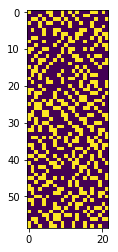

In [356]:
from matplotlib.pyplot import imshow

%matplotlib inline
imshow(np.asarray(im2))

In [357]:
brick_width = 227
brick_widthb2 = int(brick_width/2)
brick_height = 60
rbrick_wall_imdata = [[0 for x in range((wreal+1)*227)] for y in range(hreal*60)]

for i in range(hreal):
    for j in range(wreal):        
        if refined_brick_wall[i][j] == 'F':
            brick_color = 1;#(0,0,255)
        elif refined_brick_wall[i][j] == 'G':
            brick_color = 2;#(255,0,0)
        else:#if refined_brick_wall[i][j] == 'S':
            brick_color = 3;#(255,255,255)
            
        ibh = i*brick_height
        jbw = j*brick_width
        
        
        for k in range (ibh,ibh+brick_height):
            for l in range (jbw+brick_widthb2,jbw+brick_width+brick_widthb2):
                rbrick_wall_imdata[k][l]=brick_color

        for k in range (ibh,ibh+2):
            for l in range (jbw+brick_widthb2,jbw+brick_width+brick_widthb2):
                rbrick_wall_imdata[k][l]=0
        for k in range (ibh+2,ibh+brick_height-2):
            for l in range (jbw+brick_widthb2,jbw+brick_widthb2+2):
                rbrick_wall_imdata[k][l]=0
            for l in range (jbw+brick_width+brick_widthb2-3,jbw+brick_width+brick_widthb2):
                rbrick_wall_imdata[k][l]=0
        for k in range (ibh+brick_height-3,ibh+brick_height):
            for l in range (jbw+brick_widthb2,jbw+brick_width+brick_widthb2):
                rbrick_wall_imdata[k][l]=0

            
        '''if i%2 == 0:
            for k in range (ibh,ibh+brick_height):
                for l in range (jbw+brick_widthb2,jbw+brick_width+brick_widthb2):
                    rbrick_wall_imdata[k][l]=brick_color
                    
            for k in range (ibh,ibh+2):
                for l in range (jbw+brick_widthb2,jbw+brick_width+brick_widthb2):
                    rbrick_wall_imdata[k][l]=0
            for k in range (ibh+2,ibh+brick_height-2):
                for l in range (jbw+brick_widthb2,jbw+brick_widthb2+2):
                    rbrick_wall_imdata[k][l]=0
                for l in range (jbw+brick_width+brick_widthb2-3,jbw+brick_width+brick_widthb2):
                    rbrick_wall_imdata[k][l]=0
            for k in range (ibh+brick_height-3,ibh+brick_height):
                for l in range (jbw+brick_widthb2,jbw+brick_width+brick_widthb2):
                    rbrick_wall_imdata[k][l]=0
        else:
            for k in range (ibh,ibh+brick_height):
                for l in range (jbw,jbw+brick_width):
                    rbrick_wall_imdata[k][l]=brick_color

            for k in range (ibh,ibh+2):
                for l in range (jbw,jbw+brick_width):
                    rbrick_wall_imdata[k][l]=0
            for k in range (ibh+2,ibh+brick_height-2):
                for l in range (jbw,jbw+2):
                    rbrick_wall_imdata[k][l]=0
                for l in range (jbw+brick_width-3,jbw+brick_width):
                    rbrick_wall_imdata[k][l]=0
            for k in range (ibh+brick_height-3,ibh+brick_height):
                for l in range (jbw,jbw+brick_width):
                    rbrick_wall_imdata[k][l]=0'''
                    
rba = np.array(rbrick_wall_imdata)
rbf = rba.ravel()
bwimage = Image.new("P", ((wreal+1)*227,hreal*60))
bwimage.putpalette([
    0, 0, 0, # black background
    255, 0, 0, # index 1 is red (flat)
    0, 0, 255, # index 2 is yellow (gloss)
    255, 255, 255, # index 3 is white (speckle)
    86, 75, 21, # index 4 is dark greenish grey (font)
    #213, 228, 232, # index 1 is red (flat)
    #197, 211, 215, # index 2 is yellow (gloss)
    #255, 255, 255, # index 3 is white (speckle)
    #86, 75, 21, # index 4 is dark greenish grey (font)
])
bwimage.putdata(rbf)
bwimage.save('brick_wall.png')

#%matplotlib inline
#imshow(np.asarray(bwimage))

#imshow(rba)

In [358]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 

bwimage = Image.open('brick_wall.png',"r")
draw = ImageDraw.Draw(bwimage)
# font = ImageFont.truetype(<font-file>, <font-size>)
font = ImageFont.truetype("acme.ttf", 60)
# draw.text((x, y),"Sample Text",(r,g,b))
for i in range(hreal):
    for j in range(wreal):
        numstr = str(i*wreal+j)
        if(i%2==0):
            draw.text(((j+1)*brick_width, i*brick_height),numstr,4,font=font)
        else:
            draw.text((brick_widthb2+j*brick_width, i*brick_height),numstr,4,font=font)
bwimage.save('sample-out.png')
